# Heat Maps & Market Maps

We'll build off our use of `bqplot` to make a dashboard with randomly sampled data last lecture to make interactive dashboards out of "real" data using the `UFO Dataset`.

We'll also look at the `Market Map` marks in `bqplot` for another representation of mappable data in a dashboard.

Let's import our usual stuff:

In [2]:
import pandas as pd
import bqplot
import numpy as np
import traitlets
import ipywidgets
import matplotlib.pyplot as plt
####%matplotlib inline

## Review  from last time

Last time we generated random data in 3D:

We started by making a 3D dataset:

In [3]:
data3d = np.random.random( (10,10, 20))

In [4]:
data3d.shape # x, y, z

(10, 10, 20)

Recall we selected specfic x/y indices to plot.  For example if x=y=0:

In [5]:
data3d[0,0,:]

array([0.47636965, 0.6136651 , 0.54043535, 0.01383007, 0.22303403,
       0.46115163, 0.02142681, 0.16341514, 0.23163891, 0.99279605,
       0.80631994, 0.28381256, 0.37767712, 0.14863163, 0.7719806 ,
       0.03881232, 0.83173675, 0.77286762, 0.35985762, 0.0639061 ])

In [6]:
data3d[0,0,:].mean()

0.409668250646608

Now that we've decided how our label will look.  What about our heat map?  We know this is expecting 2d data as an input.  So, we'll do the same thing, we'll take a mean, but we'll do it over the whole array:

In [7]:
data3d.mean(axis=2)

array([[0.40966825, 0.44724279, 0.64566357, 0.52617436, 0.55229814,
        0.4568381 , 0.52125786, 0.49702673, 0.5177452 , 0.59447443],
       [0.5141948 , 0.44876509, 0.57739629, 0.42920724, 0.40885301,
        0.44123814, 0.48038735, 0.51320646, 0.54248668, 0.50143203],
       [0.36951696, 0.65034664, 0.45854553, 0.53286961, 0.50744225,
        0.45367653, 0.46699664, 0.50943452, 0.51603916, 0.49770903],
       [0.51529386, 0.46687266, 0.42455169, 0.4224931 , 0.45574   ,
        0.6176894 , 0.42536075, 0.5265202 , 0.5930755 , 0.49013701],
       [0.50731944, 0.43855689, 0.45858108, 0.45773197, 0.7267714 ,
        0.44467398, 0.55492718, 0.4599125 , 0.55192207, 0.46430982],
       [0.50089584, 0.49169973, 0.37964531, 0.54562393, 0.48457338,
        0.51259726, 0.58631782, 0.4739903 , 0.34775131, 0.48003365],
       [0.48390694, 0.5432987 , 0.58172279, 0.5784864 , 0.37917908,
        0.52023041, 0.44826141, 0.49617959, 0.47220668, 0.48708894],
       [0.4545293 , 0.44537408, 0.3834261

In [8]:
data3d.mean(axis=2).shape

(10, 10)

Let's build up our dashboard again, I'll copy-paste into Slack/zoom:

In [9]:
mySelectedLabel = ipywidgets.Label() # start with our label

So, all we need to to begin with is just add this sort of mean into our observation function:

In [10]:
# first, just print out what is changing, what is selected
# only support 1 selected grid
def on_selected(change):
    if len(change['owner'].selected) == 1:
        #print(change['owner'].selected[0])
        i, j = change['owner'].selected[0]
        v = data3d[i,j,:].mean() # CHANGE HERE
        mySelectedLabel.value = 'Mean Data Value = ' + str(v)
    
# 1. Data -- now 3d

# 2. Scale - color scale
col_sc = bqplot.ColorScale(scheme="Reds") 
# this is because the "bins" are just bins -- their order is NOT numerically important
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

# 3. Axis -- for colors, the axis is a colorbar!
ax_col = bqplot.ColorAxis(scale = col_sc, orientation='vertical', 
                          side='right') 
ax_x = bqplot.Axis(scale = x_sc) # same x/y ax we had before
ax_y = bqplot.Axis(scale = y_sc, orientation='vertical')

# 4. Mark -- heatmap -- CHANGE HERE
heat_map = bqplot.GridHeatMap(color = data3d.mean(axis=2), 
                              scales = {'color':col_sc, 
                                        'row':y_sc, 'column':x_sc},
                             interactions={'click':'select'},
                             anchor_style={'fill':'blue'},
                             selected_style={'opacity':1.0},
                             unselected_style={'opacity':0.8})

# 5. Interactions -- going to be built into the GridHeatMap mark (how things *look* when selection happens)
# BUT I'm going to define what happens when the interaction takes place (something is selected)
heat_map.observe(on_selected, 'selected')

# Finally, a figure!
fig = bqplot.Figure(marks = [heat_map], axes=[ax_col, ax_x, ax_y]) # have to add this axis to my figure object!
#fig

# combine the widget & figure and display both at the same time!
myDashboard = ipywidgets.VBox([mySelectedLabel, fig])
myDashboard # show the dashboard

Ok, so we have the first few components of our dashboard with our new 3D dataset.  Let's work on the histogram.  We'll put this to the right of our label+heatmap, but first things first, the histogram:

In [11]:
# 1. Data -- what is the data for the histogram
i, j = 0, 0 # just as an example
data3d[i,j] # 20 elements

array([0.47636965, 0.6136651 , 0.54043535, 0.01383007, 0.22303403,
       0.46115163, 0.02142681, 0.16341514, 0.23163891, 0.99279605,
       0.80631994, 0.28381256, 0.37767712, 0.14863163, 0.7719806 ,
       0.03881232, 0.83173675, 0.77286762, 0.35985762, 0.0639061 ])

This is the data that we want to feed into our histogram so that if we select on i,j with our heatmap it will show us the distribution of values along the 3rd dimension.

In [12]:
# 2. Scales -- linear for a histogram of numerical data
x_sch = bqplot.LinearScale()
y_sch = bqplot.LinearScale()

In [13]:
# 3. Axis
x_axh = bqplot.Axis(scale = x_sch, label = 'Value of 3rd axis')
y_axh = bqplot.Axis(scale = y_sch, 
                    orientation = 'vertical', 
                    label='Frequency')

Marks will be the bqplot.Hist mark for histograms:

In [14]:
bqplot.Hist?

In [15]:
hist = bqplot.Hist(sample = data3d[i,j,:], # note: we are "hard coding" the x/y indicies as i,j
                   normalized = False, # normalized=False means we get counts in each bin
                   scales = {'sample': x_sch, 'count': y_sch}, # sample is data values, count is frequency
                   bins = 5) # number of bins

Note here that we specified this plot in a different way than the `GridHeatMap` and `Scatter` -- each type of `bqplot` plot has different parameters associated with the type of plot we are using.  Let's combine this as a figure and take a look!

In [16]:
figh = bqplot.Figure(marks = [hist], axes = [x_axh, y_axh])
figh # your's might look different because you have different random numbers!

Figure(axes=[Axis(label='Value of 3rd axis', scale=LinearScale(), side='bottom'), Axis(label='Frequency', orie…

Let's pause here and think about how to link up our histogram i,j with our selections on the heatmap.  First, what values of the histogram can we update?  Let's check:

In [17]:
hist.keys

['_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'apply_clip',
 'bins',
 'colors',
 'count',
 'display_legend',
 'enable_hover',
 'interactions',
 'labels',
 'midpoints',
 'normalized',
 'opacities',
 'preserve_domain',
 'sample',
 'scales',
 'scales_metadata',
 'selected',
 'selected_style',
 'stroke',
 'tooltip',
 'tooltip_location',
 'tooltip_style',
 'unselected_style',
 'visible']

In [18]:
hist.sample

array([0.47636965, 0.6136651 , 0.54043535, 0.01383007, 0.22303403,
       0.46115163, 0.02142681, 0.16341514, 0.23163891, 0.99279605,
       0.80631994, 0.28381256, 0.37767712, 0.14863163, 0.7719806 ,
       0.03881232, 0.83173675, 0.77286762, 0.35985762, 0.0639061 ])

Hey!  Here is where our data values are stored!  Like with when we observe changes in our heat map and update the values of our ipywidget's value we want to also update this sample's data!  

Let's update our `on_selected` function to reflect this:

In [19]:
def on_selected(change):
    if len(change['owner'].selected) == 1: #only 1 selected
        i, j = change['owner'].selected[0] # grab the x/y coordinates
        v = data3d[i,j].mean() # grab data value at x/y index and mean along z
        mySelectedLabel.value = 'Data Sum = ' + str(v) # set our label
        # NOW ALSO: update our histogram
        hist.sample = data3d[i,j,:]

We don't have to go through the exersise of rebuilding our heatmap and histogram in general, but let's just do it for the sake of completeness and not accidentally re-linking thinks we shouldn't:

#1 heatmap:

In [20]:
# (1) Scales: x/y, colors
col_sc = bqplot.ColorScale(scheme = "Reds")
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

# (2) Axis: x/y, colors
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')
x_ax = bqplot.Axis(scale = x_sc)
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical')

# (3) Marks: heatmap
heat_map = bqplot.GridHeatMap(color = data3d.mean(axis=2),
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'}, # make interactive on click of each box
                              anchor_style = {'fill':'blue'}, # to make our selection blue
                              selected_style = {'opacity': 1.0}, # make 100% opaque if box is selected
                              unselected_style = {'opacity': 0.8}) # make a little see-through if not

# (4) Link selection on heatmap to other things
heat_map.observe(on_selected, 'selected')

# (5) Paint heatmap canvas, don't display yet:
fig_heatmap = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])

#2 histogram:

In [21]:
# (1) scales: x/y, linear
x_sch = bqplot.LinearScale() # range of z-axis data
y_sch = bqplot.LinearScale() # frequency of z-axis data in bins

# (2) axis: x/y
x_axh = bqplot.Axis(scale = x_sch, label = 'Value of 3rd axis')
y_axh = bqplot.Axis(scale = y_sch, 
                    orientation = 'vertical', 
                    label='Frequency')

# (3) Marks: histogram - start with just 0,0 in i/j -- can do other place holders
hist = bqplot.Hist(sample = data3d[0,0,:],
                   normalized = False, # normalized=False means we get counts in each bin
                   scales = {'sample': x_sch, 'count': y_sch}, # sample is data values, count is frequency
                   bins = 5) # number of bins

# (4) NO LINKING ON HISTOGRAM SIDE

# (5) Paint histogram canvas, don't display yet
fig_hist = bqplot.Figure(marks = [hist], axes = [x_axh, y_axh])

Create dashboard layout and display:

In [22]:
# side by side figures
figures = ipywidgets.HBox([fig_heatmap, fig_hist])

# label on top
myDashboard = ipywidgets.VBox([mySelectedLabel, figures])
myDashboard

Ok close, but its all smooshed!  We can play with the layout of our plots before we display.  To do this we use some more CSS-like styling options, in particular, `layout`:

In [23]:
# mess with figure layout:
fig_heatmap.layout.min_width = '500px' # feel free to change for your screen
fig_hist.layout.min_width = '500px'

# side by side figures
figures = ipywidgets.HBox([fig_heatmap, fig_hist])

# label on top
myDashboard = ipywidgets.VBox([mySelectedLabel, figures])
myDashboard

Note that update was "back-reactive" in that it changed the figure layout above as well!  Super sweet!

#### Further complications: linking in different directions

We can also apply some other links to further enhance our dashboard.  One that we've messed with before is allowing the user to select the number of bins of a histogram.

There are a few ways to do this, but one "easier" way is to just link the histogram "bins" with the value of a bins-slider.  

If we recall: `bins` was another key that was listed in hist:

In [24]:
hist.keys

['_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'apply_clip',
 'bins',
 'colors',
 'count',
 'display_legend',
 'enable_hover',
 'interactions',
 'labels',
 'midpoints',
 'normalized',
 'opacities',
 'preserve_domain',
 'sample',
 'scales',
 'scales_metadata',
 'selected',
 'selected_style',
 'stroke',
 'tooltip',
 'tooltip_location',
 'tooltip_style',
 'unselected_style',
 'visible']

In [25]:
hist.bins = 5 # this changes the bins of our histogram above in a back-reactive way -- traitlets magic!

Let's add a little integer slider to allow our user to select the number of bins for the histogram:

In [26]:
bins_slider = ipywidgets.IntSlider(value=5, min=1, max=data3d.shape[2]) # don't make more bins than data points!

A reminder of what this looks like:

In [27]:
bins_slider

IntSlider(value=5, max=20, min=1)

We can use `link` or `jslink` to link the value of this slider to our histogram's number of bins:

In [28]:
ipywidgets.jslink((bins_slider, 'value'), (hist, 'bins'))

Link(source=(IntSlider(value=5, max=20, min=1), 'value'), target=(Hist(bins=5, colors=['steelblue'], count=arr…

While this change is "backreactive", let's redo our figure layout so we can see everything a bit better:

In [29]:
# mess with figure layout:
fig_heatmap.layout.min_width = '500px' # feel free to change for your screen
fig_hist.layout.min_width = '500px'

# side by side figures
figures = ipywidgets.HBox([fig_heatmap, fig_hist])

# label on top to the left, bins slider to the right
controls = ipywidgets.HBox([mySelectedLabel, bins_slider])

# combined
myDashboard = ipywidgets.VBox([controls, figures])
myDashboard

## Dashboarding with "real" data using the UFO dataset

Let's read in the UFO dataset:

In [30]:
ufos = pd.read_csv("/Users/jillnaiman/Downloads/ufo-scrubbed-geocoded-time-standardized-00.csv",
                  names = ["date", "city", "state", "country",
                          "shape", "duration_seconds", "duration",
                          "comment", "report_date", 
                           "latitude", "longitude"],
                  parse_dates = ["date", "report_date"])

# or from the web (but takes longer):
# ufos = pd.read_csv("https://uiuc-ischool-dataviz.github.io/spring2019online/week04/data/ufo-scrubbed-geocoded-time-standardized-00.csv",
#                   names = ["date", "city", "state", "country",
#                           "shape", "duration_seconds", "duration",
#                           "comment", "report_date", 
#                            "latitude", "longitude"],
#                   parse_dates = ["date", "report_date"])

### Aside: downsampling

We have covered downsampling before, but we will repeat it here in case folks have slower computers and don't want to use the full dataset while in class.

We can remind ourselves of how many entries are in this dataset:

In [31]:
len(ufos)

80332

80,000 entries is a lot!  So, to speed up our interactivity, we can randomly sample this dataset for plotting purposes.  Lets down sample to 1000 samples:

In [32]:
nsamples = 1000
#nsamples = 5000 # if you want a larger sample
downSampleMask = np.random.choice(range(len(ufos)-1), 
                                  nsamples, replace=False)
downSampleMask
# so, downsample mask is now a list of random indicies for 
#  the UFO dataset.  Your's will not be the same because we have not set a seed.

array([50014, 52171, 46137, 67454,  9008, 75902, 63013, 50007,  3473,
       30857, 30430, 58279, 23112, 14999, 18422, 26548, 30157, 57412,
       48759,  9193, 69869, 69148, 24063, 22870, 63965, 35261, 36652,
       44465, 57155, 58268, 72963, 20829, 10055, 17983, 50519, 12227,
       24831,  9092, 33386, 37463, 63121, 27679, 77415, 34576,  1476,
       70667, 72067, 25401, 65209, 72953, 74412, 21853, 63936, 23069,
       57026, 75858, 76867, 42204,  7724, 58630, 32923, 22421, 22965,
       69262, 79611, 72544, 67576, 46188, 34857,   574, 68421, 49140,
       20457, 36556, 40139, 32730, 74172, 72105, 25708, 61262, 40570,
        5421,  8520, 66397, 40925, 14616, 49653, 38062, 59582, 21706,
       57054, 61311, 77582, 41985, 73411, 29282, 53667, 79503, 32915,
       56576, 54810, 34179, 70699, 45406, 42878, 73289, 59896, 53073,
       71941,    58, 47731, 63739, 25003, 46912, 68128, 36210, 67624,
       27211, 27016, 51334, 31196, 71065, 51977, 16548,   961, 48501,
       47637, 10143,

Let's create a subset of our data with the `.loc` function:

In [33]:
ufosDS = ufos.loc[downSampleMask]
len(ufosDS)
# so much shorter

1000

We can also see that this is saved as a dataframe:

In [34]:
ufosDS

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
50014,2012-06-18 20:30:00,carr (west of),co,us,changing,600.0,ten minutes +,Bright light over mountains of Colorado,2012-06-20,40.896111,-104.874444
52171,2012-06-27 18:00:00,san leandro,ca,us,disk,900.0,15 minutes,Two flat disk shaped long objects hovering in sky,2012-10-30,37.725000,-122.155000
46137,2013-05-07 21:24:00,villa ridge,mo,us,circle,120.0,2 minutes,Fireball in sky.,2013-05-15,38.472500,-90.886667
67454,2006-08-18 03:00:00,south elgin,il,us,changing,1200.0,15-20minutes,3 black craft&#44changed shape &amp; became me...,2007-02-24,41.994167,-88.292222
9008,2012-11-13 19:36:00,webster,ma,us,fireball,5.0,5 seconds,I was sitting in my computer room when I heard...,2012-11-19,42.050000,-71.880556
...,...,...,...,...,...,...,...,...,...,...,...
75956,2011-09-19 21:55:00,cleveland,oh,us,triangle,5.0,5 seconds,I was driving down a Cleveland street approach...,2011-10-10,41.499444,-81.695556
34640,2003-03-04 07:34:00,westlake,la,us,triangle,10.0,10 seconds,Me and a co worker observed three craft flying...,2003-03-21,30.241944,-93.250556
33501,2010-03-25 15:00:00,sachse,tx,us,sphere,45.0,45 seconds,GIANT ORB AT AFTERNOON TIME...NO MISTAKE IN ID...,2013-09-30,32.976111,-96.595000
46583,2005-06-10 14:00:00,freeport,ny,us,unknown,30.0,30 seconds,Strange sight on Long Island...daytime,2005-06-20,40.657500,-73.583611


Lets make a super quick scatter plot to remind ourselves what this looks like:

In [35]:
# Set up x/y scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# Set p axis
x_ax = bqplot.Axis(scale = x_sc, label='Longitude')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label='Latitude')

#(1) set up marks
scatters = bqplot.Scatter(x = ufosDS['longitude'],
                          y = ufosDS['latitude'],
                          scales = {'x': x_sc, 'y': y_sc})

fig = bqplot.Figure(marks = [scatters], axes = [x_ax, y_ax]) 
fig

Figure(axes=[Axis(label='Longitude', scale=LinearScale()), Axis(label='Latitude', orientation='vertical', scal…

Note I haven't added in colors or interactions.  Let's at least add some colors in:

In [36]:
# lets make a super quick scatter plot to remind ourselves what this looks like:
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

x_ax = bqplot.Axis(scale = x_sc, label='Longitude')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label='Latitude')


# Let's add in a color scale
c_sc = bqplot.ColorScale() # color scale
# color axes:
c_ax = bqplot.ColorAxis(scale = c_sc, label='Duration in sec', 
                        orientation = 'vertical', side = 'right')

# now replot:
scatters = bqplot.Scatter(x = ufosDS['longitude'],
                          y = ufosDS['latitude'],
                          color=ufosDS['duration_seconds'],
                          scales = {'x': x_sc, 'y': y_sc, 'color':c_sc})


fig = bqplot.Figure(marks = [scatters], axes = [x_ax, y_ax, c_ax]) 
fig

Figure(axes=[Axis(label='Longitude', scale=LinearScale()), Axis(label='Latitude', orientation='vertical', scal…

You'll note that this is a pretty muted color map.  This is because we are coloring by duration, and if you recall there is a *huge* range in durations:

In [37]:
ufosDS['duration_seconds'].min(), ufosDS['duration_seconds'].max()

(1.0, 2631600.0)

To account for this, let's take the log-base-10 of the duration when we plot.  We should make sure we specify this on our color axis (color bar) label:

In [38]:
# lets make a super quick scatter plot to remind ourselves what this looks like:
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

x_ax = bqplot.Axis(scale = x_sc, label='Longitude')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label='Latitude')


# (2) recall we can also color by things like duration
c_sc = bqplot.ColorScale() # color scale

# updated color axis with log scaling
c_ax = bqplot.ColorAxis(scale = c_sc, label='log(sec)', 
                        orientation = 'vertical', side = 'right')
scatters = bqplot.Scatter(x = ufosDS['longitude'],
                          y = ufosDS['latitude'],
                          color=np.log10(ufosDS['duration_seconds']), # here we take log, base 10
                          scales = {'x': x_sc, 'y': y_sc, 'color':c_sc})

fig = bqplot.Figure(marks = [scatters], axes = [x_ax, y_ax, c_ax]) 
fig

Figure(axes=[Axis(label='Longitude', scale=LinearScale()), Axis(label='Latitude', orientation='vertical', scal…

## Heatmap Dashboard with our UFO dataset.

Now we are going to use our heatmap idea to plot this data again. Note this will shmear out a lot of the nice map stuff we see above since we will be binning in lat/long. Don't worry!  We'll talk about making maps in the 2nd part of class. 

What should we color by?  Lets do by duration again.

To get this to work with our heatmap, we're going to have to do some rebinning. Right now, our data is all in 1 long list we need to rebin things in a 2d histogram where the x axis is longitude & y is latitude.

There are a few ways to do this, we'll use numpy to do our binning and use this as input into `bqplot.GridHeatMap`.  Before that, we can get a sense of what we think things will look like using matplotlib's `hist2d`.  We'll use the siting duration as *weights* into our histogram - so bins that have several long sitings will be counted as significant as well as bins that have multiple short sitings.

We'll skip down to the code to do the histogramming, but here is an aside with more details if you'd like to look at it:

### ASIDE

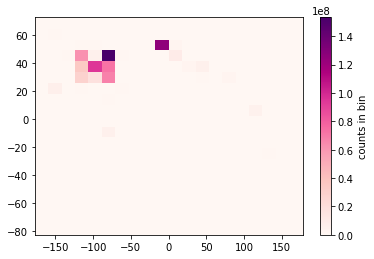

In [39]:
plt.hist2d(ufos['longitude'], ufos['latitude'], 
           weights=ufos['duration_seconds'], bins=20, cmap='RdPu')
cb = plt.colorbar()
cb.set_label('counts in bin')

Note that here I am using the whole UFO dataset again, since we are rebinning anyway.  Feel free to use `ufoDS` if it works better on your computer.

Again, we know that the duration should be log scaled, and we can do that with the `SymLogNorm` color scale in matplotlib if we want:

/Users/jillnaiman/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  This is separate from the ipykernel package so we can avoid doing imports until


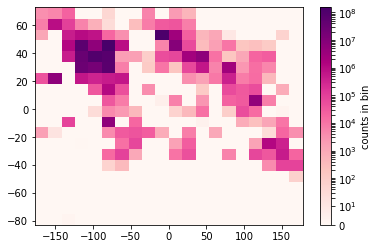

In [40]:
import matplotlib.colors as mpl_colors
plt.hist2d(ufos['longitude'], ufos['latitude'], weights=ufos['duration_seconds'], 
           bins=20, cmap='RdPu', norm = mpl_colors.SymLogNorm(10)) # ignorning the warning (10 -> e)
cb = plt.colorbar()
cb.set_label('counts in bin')

Now this is starting to look a bit more like our scatter plot, but we can more easily make out areas of long duration (like in the US).  Ok, we want to incorporate interactivity, so let's use the `bqplot` engine + our ideas of the heatmap marks that we used last time to create our own clickable map.

Let's use `numpy`'s 2d histogram function to do that for us:

In [41]:
# ***START WITH 10 EACH**
nlong = 20 
nlat = 20

#(1)
hist2d, long_edges, lat_edges = np.histogram2d(ufos['longitude'], 
                                               ufos['latitude'], 
                                               weights=ufos['duration_seconds'], 
                                              bins=[nlong,nlat])

# this returns the TOTAL duration of ufo events in each bin
# Let's take a quick look at this data
hist2d

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.80000000e+03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.70640000e+04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.20300000e+03, 7.37100000e+03, 3.70000000e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.50000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.75425400e+06, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 9.63978000e+05, 5.10500000e+03],
       [2.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 8.78160000e+04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.7449

In [42]:
hist2d.max(), hist2d.min() # a pretty big range!

(153348519.88, 0.0)

Let's take a quick look at this with `imshow` in `matplotlib`:

/Users/jillnaiman/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  """Entry point for launching an IPython kernel.


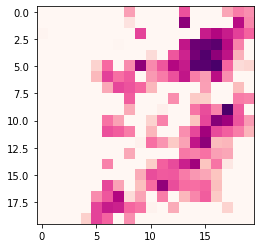

In [43]:
plt.imshow(hist2d, cmap='RdPu', norm = mpl_colors.SymLogNorm(10))

Note that the x/y labels are just the bin indicies.  But even so, we can see that this is rotated to what we want to acutally plot!  

Different methods of histogramming will give you different shaped outputs.  Worse still, depending on what viz engine you're using, it expects different orientations of the data going in!  My suggestion is to experiement and make sure you're data is in the correct orientation by plotting it a few times.

For `bqplot`, we actually want our orientation to be *upsidedown* which we can get by taking the transpose of `hist2d`:

/Users/jillnaiman/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  """Entry point for launching an IPython kernel.


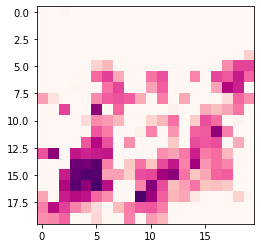

In [44]:
plt.imshow(hist2d.T, cmap='RdPu', norm = mpl_colors.SymLogNorm(10))

Ok, let's make our histogramming more complex.  

As an aside: we want to treat the histogram as a probability instead of a total weighted count:

In [45]:
hist2d, long_edges, lat_edges = np.histogram2d(ufos['longitude'], 
                                               ufos['latitude'], 
                                               weights=ufos['duration_seconds'],
                                              density=True, 
                                              bins = [nlong,nlat])
hist2d.max(), hist2d.min()

(0.0015329854771788194, 0.0)

What are the shapes of the different outputs here?

In [46]:
hist2d.shape, long_edges.shape, lat_edges.shape

((20, 20), (21,), (21,))

Note that the long/lat edges have 1 more count than the histogram size.  This is because they are indeed edges.  To get bin centers, which is what we want to do for plotting we can do:

In [47]:
long_centers = (long_edges[:-1] + long_edges[1:]) / 2
long_centers

array([-167.78055671, -150.02555893, -132.27056115, -114.51556337,
        -96.76056559,  -79.00556781,  -61.25057003,  -43.49557225,
        -25.74057447,   -7.98557669,    9.76942109,   27.52441887,
         45.27941665,   63.03441443,   80.78941221,   98.54440999,
        116.29940777,  134.05440555,  151.80940333,  169.56440111])

In [48]:
lat_centers = (lat_edges[:-1] + lat_edges[1:]) / 2
lat_centers

array([-78.9736832, -71.1955456, -63.417408 , -55.6392704, -47.8611328,
       -40.0829952, -32.3048576, -24.52672  , -16.7485824,  -8.9704448,
        -1.1923072,   6.5858304,  14.363968 ,  22.1421056,  29.9202432,
        37.6983808,  45.4765184,  53.254656 ,  61.0327936,  68.8109312])

We might want to control where our bins are, we can do this by specifying bin edges ourselves:

In [49]:
long_bins = np.linspace(-150, 150, nlong+1)
lat_bins = np.linspace(-40, 70, nlat+1)
print(long_bins, long_bins.shape)
print(lat_bins, lat_bins.shape)

[-150. -135. -120. -105.  -90.  -75.  -60.  -45.  -30.  -15.    0.   15.
   30.   45.   60.   75.   90.  105.  120.  135.  150.] (21,)
[-40.  -34.5 -29.  -23.5 -18.  -12.5  -7.   -1.5   4.    9.5  15.   20.5
  26.   31.5  37.   42.5  48.   53.5  59.   64.5  70. ] (21,)


Let's take these bins as our inputs and regenerate our histogram:

In [50]:
hist2d, long_edges, lat_edges = np.histogram2d(ufos['longitude'], 
                                               ufos['latitude'], 
                                               weights=ufos['duration_seconds'],
                                              bins = [long_bins,lat_bins])

And grab our centers of lat and long for plotting as well (note: if you're like 30% with inline programming, that is totally fine!):

In [51]:
long_centers = (long_edges[:-1] + long_edges[1:]) / 2
lat_centers = (lat_edges[:-1] + lat_edges[1:]) / 2

We know that we want to input this into `bqplot`'s grid heatmap, so we need to take the transpose:

In [52]:
hist2d = hist2d.T

What is the range of values in our plot?

In [53]:
hist2d.min(), hist2d.max(), hist2d[hist2d>0].min() # this is the *total duration* of sitings in a bin

(0.0, 125056847.51, 1.0)

We still have a big range in count values because we weighted by the non-log duration above.  So we'll instead take the log of our output histogram.

For aesthetic value, we want to have areas where there are no counts (like the ocean) show up as zero.  We can do that by a little trick -- setting the 0 values to `NaN`.  We will then take the log for color scaling:

In [54]:
np.log10(hist2d).min()

/Users/jillnaiman/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


-inf

The above gives us an error which can mess up our color maps.  So we'll be tricky:

In [55]:
hist2d[hist2d <= 0] = np.nan # set zeros to NaNs
# then take log
hist2d = np.log10(hist2d)
#hist2d[0:10]

### END ASIDE

In the interest of time, we won't be doing the binning in class, but here is a function that will do this for us:

In [56]:
def generate_histogram_from_lat_long(ufos, nlong=20, nlat=20, longmin=-150, longmax=150,
                                     latmin=-40, latmax=70,
                                     takeLog=True):
    long_bins = np.linspace(longmin, longmax, nlong+1)
    lat_bins = np.linspace(latmin, latmax, nlat+1)
    hist2d, long_edges, lat_edges = np.histogram2d(ufos['longitude'], 
                                                   ufos['latitude'], 
                                                   weights=ufos['duration_seconds'],
                                                  bins = [long_bins,lat_bins])
    hist2d = hist2d.T
    if takeLog:
        hist2d[hist2d <= 0] = np.nan # set zeros to NaNs
        # then take log
        hist2d = np.log10(hist2d)
    long_centers = (long_edges[:-1] + long_edges[1:]) / 2
    lat_centers = (lat_edges[:-1] + lat_edges[1:]) / 2
    return hist2d, long_centers, lat_centers, long_edges, lat_edges

Now we'll just use this!

In [57]:
hist2d, long_centers, lat_centers, long_edges, lat_edges = generate_histogram_from_lat_long(ufos)

Now that we have all that fancy binning out of the way, lets proceed as normal:

In [58]:
# (1) add scales - colors, x & y
col_sc = bqplot.ColorScale(scheme="RdPu", 
                           min=np.nanmin(hist2d), 
                           max=np.nanmax(hist2d))
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# (2) create axis - for colors, x & y
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')

x_ax = bqplot.Axis(scale = x_sc, label='Longitude')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label = 'Latitude')

# (3) Marks
heat_map = bqplot.GridHeatMap(color = hist2d,
                              row = lat_centers, 
                              column = long_centers,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'},
                              anchor_style = {'fill':'blue'}, 
                              selected_style = {'opacity': 1.0},
                              unselected_style = {'opacity': 1.0})

# (4) interactivity - none yet

# (5) put it all together in a figure
fig = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])
fig

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(max=8.09710747658943, min=0.0, scheme='RdPu'),…

Let's start building up our dashboard like before.  One easy thing we can do is add a label:

In [59]:
# (1) add scales - colors, x & y
col_sc = bqplot.ColorScale(scheme="RdPu", 
                           min=np.nanmin(hist2d), 
                           max=np.nanmax(hist2d))
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# (2) create axis - for colors, x & y
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')

x_ax = bqplot.Axis(scale = x_sc, label='Longitude')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label = 'Latitude')

# (3) Marks
heat_map = bqplot.GridHeatMap(color = hist2d,
                              row = lat_centers, 
                              column = long_centers,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'},
                              anchor_style = {'fill':'blue'}, 
                              selected_style = {'opacity': 1.0},
                              unselected_style = {'opacity': 1.0})

# (4) interactivity - label
mySelectedLabel = ipywidgets.Label()
def get_data_value(change):
    if len(change['owner'].selected) == 1: #only 1 selected
        i,j = change['owner'].selected[0]
        v = hist2d[i,j] # grab data value
        mySelectedLabel.value = 'Total duration in log(sec) = ' + str(v) # set our label
    
# make sure we check out     
heat_map.observe(get_data_value, 'selected')


# (5) put it all together in a figure
fig = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])
myDashboard = ipywidgets.VBox([mySelectedLabel,fig])
myDashboard

Let's also include information about the duration as a function of date in a particular bin on another plot -- a scatter plot this time.  Let's first start by making this plot alone before putting it into our dashboard.

In [60]:
import datetime as dt # we'll use this to format our dates all fancy like

#1: Now let's make our scales.  We'll start with a new `bqplot` scale called `DateScale`:

In [61]:
x_scl = bqplot.DateScale(min=dt.datetime(1950,1,1),max=dt.datetime(2020,1,1)) # note: for dates on x-axis

Let's plot the duration on a log scale since we know that's probably what will look best based on the range of durations:

In [62]:
y_scl = bqplot.LogScale()

#2: Our axis:

In [63]:
ax_xcl = bqplot.Axis(label='Date', scale=x_scl)
ax_ycl = bqplot.Axis(label='Duration in Sec', scale=y_scl, 
                    orientation='vertical', side='left')

#3: our marks, in this case a scatter plot

Thinking ahead, we know that we want to select a 2d bin from our heatmap to then draw scatters for our scatter plot.  Let's write things in this way:

In [64]:
i,j = 19,0 # picking an x/y bin -- this is one I know has a lot of data!

Let's specify the range of longs & lats for this selection of x/y bin:

In [65]:
longs = [long_edges[j], long_edges[j+1]] # min/max longitude
lats = [lat_edges[i],lat_edges[i+1]] # min/max latitude

Let's *mask* out a subset of the UFO dataset with *only* these ranges of longitude and latitude:

In [66]:
region_mask = ( (ufos['latitude'] >= lats[0]) & (ufos['latitude']<=lats[1]) &\
                (ufos['longitude'] >= longs[0]) & (ufos['longitude']<=longs[1]) )

# we can see this selects for the upper right point of our heatmap
lats, longs, ufos['latitude'][region_mask]

([64.5, 70.0],
 [-150.0, -135.0],
 327      64.837778
 2845     64.837778
 3620     64.837778
 4602     64.751111
 6011     64.837778
            ...    
 77347    64.751111
 77497    64.837778
 78571    64.837778
 79029    64.837778
 79470    64.837778
 Name: latitude, Length: 74, dtype: float64)

We won't add any interactivity to this plot -- the interactivity will be drawn from our heatmap, so all that is left to do is add in marks:

#4: Marks

In [67]:
# lets plot the durations as a function of year there
duration_scatt = bqplot.Scatter(x = ufos['date'][region_mask],
                               y = ufos['duration_seconds'][region_mask], 
                              scales={'x':x_scl, 'y':y_scl})

#5: Put it all together and take a look!

In [68]:
fig_dur = bqplot.Figure(marks = [duration_scatt], axes = [ax_xcl, ax_ycl])
fig_dur

Figure(axes=[Axis(label='Date', scale=DateScale(max=datetime.datetime(2020, 1, 1, 0, 0), min=datetime.datetime…

### Scatter plot + label driven by heatmap dashboard

Let's put together our heatmap + label + scatter plot as a dashboard.  I'll recopy what we had before into some cells we can put together:

In [69]:
# (I) CREATE LABEL
mySelectedLabel = ipywidgets.Label()

In [70]:
# (II) HEAT MAP

# (1) add scales - colors, x & y
col_sc = bqplot.ColorScale(scheme="RdPu", 
                           min=np.nanmin(hist2d), 
                           max=np.nanmax(hist2d))
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# (2) create axis - for colors, x & y
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')

x_ax = bqplot.Axis(scale = x_sc, label='Longitude')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label = 'Latitude')

# (3) Marks
heat_map = bqplot.GridHeatMap(color = hist2d,
                              row = lat_centers, 
                              column = long_centers,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'},
                              anchor_style = {'fill':'blue'}, 
                              selected_style = {'opacity': 1.0},
                              unselected_style = {'opacity': 1.0})

# skipping 4 & 5 for now

In [71]:
# (III) SCATTER PLOT

# (1) scales
x_scl = bqplot.DateScale(min=dt.datetime(1950,1,1),max=dt.datetime(2020,1,1)) # note: for dates on x-axis
y_scl = bqplot.LogScale()

# (2) Axis
ax_xcl = bqplot.Axis(label='Date', scale=x_scl)
ax_ycl = bqplot.Axis(label='Duration in Sec', scale=y_scl, 
                    orientation='vertical', side='left')

# (3) Marks
# NOTE: we'll start with some default value selected
i,j = 19,0 # picking an x/y bin -- this is one I know has a lot of data!
longs = [long_edges[j], long_edges[j+1]] # min/max longitude
lats = [lat_edges[i],lat_edges[i+1]] # min/max latitude
# lets plot the durations as a function of year there
duration_scatt = bqplot.Scatter(x = ufos['date'][region_mask],
                               y = ufos['duration_seconds'][region_mask], 
                              scales={'x':x_scl, 'y':y_scl})

# skipping 4 & 5 for now

In [72]:
# (IV) LINKING TOGETHER DASHBOARD WITH INTERACTIVITY

def get_data_value(change):
    if len(change['owner'].selected) == 1: #only 1 selected
        i,j = change['owner'].selected[0]
        v = hist2d[i,j] # grab data value
        mySelectedLabel.value = 'Total duration in log(sec) = ' + str(v) # set our label
        # now: for the scatter plot -- THIS PART IS NEW
        longs = [long_edges[j], long_edges[j+1]]
        lats = [lat_edges[i],lat_edges[i+1]]
        region_mask = ( (ufos['latitude'] >= lats[0]) & (ufos['latitude']<=lats[1]) &\
                    (ufos['longitude'] >= longs[0]) & (ufos['longitude']<=longs[1]) )
        duration_scatt.x = ufos['date'][region_mask]
        duration_scatt.y = ufos['duration_seconds'][region_mask]

heat_map.observe(get_data_value, 'selected')

In [73]:
# (5) create figures
fig_heatmap = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])
fig_dur = bqplot.Figure(marks = [duration_scatt], axes = [ax_xcl, ax_ycl])

In [74]:
# since we know from last time we wanna make our figs a bit bigger:
fig_heatmap.layout.min_width='500px'
fig_dur.layout.min_width='500px'

myDashboard = ipywidgets.VBox([mySelectedLabel, ipywidgets.HBox([fig_heatmap,fig_dur])])
myDashboard

Note that when I select a deep purple place, my scatter plot is very laggy, this makes me think we should do this with a histogram/bar type plot.  So let's try that below, by augmenting our creation of our dashboard:

In [75]:
# Below hasn't changed:

# (I) CREATE LABEL
mySelectedLabel = ipywidgets.Label()

# (II) HEAT MAP

# (1) add scales - colors, x & y
col_sc = bqplot.ColorScale(scheme="RdPu", 
                           min=np.nanmin(hist2d), 
                           max=np.nanmax(hist2d))
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# (2) create axis - for colors, x & y
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')

x_ax = bqplot.Axis(scale = x_sc, label='Longitude')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label = 'Latitude')

# (3) Marks
heat_map = bqplot.GridHeatMap(color = hist2d,
                              row = lat_centers, 
                              column = long_centers,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'},
                              anchor_style = {'fill':'blue'}, 
                              selected_style = {'opacity': 1.0},
                              unselected_style = {'opacity': 1.0})

# skipping 4 & 5 for now

Let's use a `Bar` mark from `bqplot` to plot duration as a function of time:

In [76]:
# (II) BAR PLOT

# (1-2) scales & ax in usual way
x_scl = bqplot.LinearScale() # note we are back to linears
y_scl = bqplot.LinearScale()
ax_xcl = bqplot.Axis(label='Date', scale=x_scl)
ax_ycl = bqplot.Axis(label='Total duration in Sec', scale=y_scl, 
                    orientation='vertical', side='left')

# create the data mask for each binned region like we did before:
i,j = 19,0
longs = [long_edges[j], long_edges[j+1]]
lats = [lat_edges[i],lat_edges[i+1]]
region_mask = ( (ufos['latitude'] >= lats[0]) & (ufos['latitude']<=lats[1]) &\
                (ufos['longitude'] >= longs[0]) & (ufos['longitude']<=longs[1]) )

Here, we'll use `numpy`'s histogram function (this time in 1D) to grab all of the *years* overwhich the durations occur.  We'll do a count of UFO sitings per binned year, weighted by the duration of sitings:

In [77]:
ufos['date']

0       1949-10-10 20:30:00
1       1949-10-10 21:00:00
2       1955-10-10 17:00:00
3       1956-10-10 21:00:00
4       1960-10-10 20:00:00
                ...        
80327   2013-09-09 21:15:00
80328   2013-09-09 22:00:00
80329   2013-09-09 22:00:00
80330   2013-09-09 22:20:00
80331   2013-09-09 23:00:00
Name: date, Length: 80332, dtype: datetime64[ns]

For nice formatting purposes, let's create a column that just has years:

In [78]:
ufos['year'] = ufos['date'].dt.year
ufos['year']

0        1949
1        1949
2        1955
3        1956
4        1960
         ... 
80327    2013
80328    2013
80329    2013
80330    2013
80331    2013
Name: year, Length: 80332, dtype: int64

In [79]:
# Histogram, weight by duration, 10 bins in years:
dur, dur_edges = np.histogram(ufos['year'][region_mask],
                              weights=ufos['duration_seconds'][region_mask],
                              bins=10)

Get bin centers:

In [80]:
dur_centers = (dur_edges[:-1] + dur_edges[1:]) / 2

Finally, create the marks for the bar-plot:

In [81]:
duration_hist = bqplot.Bars(x=dur_centers, y=dur, 
                          scales={'x':x_scl, 'y':y_scl})

#4: Now we can finally add some interactivity.  We have to be careful to not try to plot bars when there is no data in our selection.

In [82]:
def get_data_value(change):
    if len(change['owner'].selected) == 1: #only 1 selected
        i,j = change['owner'].selected[0]
        v = hist2d[i,j] # grab data value
        mySelectedLabel.value = 'Total duration in log(sec) = ' + str(v) # set our label
        # Histogram:
        longs = [long_edges[j], long_edges[j+1]]
        lats = [lat_edges[i],lat_edges[i+1]]
        region_mask = ( (ufos['latitude'] >= lats[0]) & (ufos['latitude']<=lats[1]) &\
                    (ufos['longitude'] >= longs[0]) & (ufos['longitude']<=longs[1]) )
        if len(ufos['year'][region_mask]) > 0: # make sure point exist so no histogram errors!
            dur, dur_edges = np.histogram(ufos['year'][region_mask],
                                          weights=ufos['duration_seconds'][region_mask],
                                          bins=10)
            dur_centers = (dur_edges[:-1] + dur_edges[1:]) / 2
            duration_hist.x = dur_centers
            duration_hist.y = dur

# make sure we connect to heatmap     
heat_map.observe(get_data_value, 'selected')

#5: Put the figures together:

In [83]:
fig_heatmap = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])
fig_dur = bqplot.Figure(marks = [duration_hist], axes = [ax_xcl, ax_ycl])

In [84]:
fig_heatmap.layout.min_width = '500px'
fig_dur.layout.min_width = '500px'

plots = ipywidgets.HBox([fig_heatmap,fig_dur])
myDashboard = ipywidgets.VBox([mySelectedLabel, plots])
myDashboard

So, this is much more reactive than what we had before, while still keeping a lot of the same transfer of information.  Arguably, this is an even *clearer* representation of what we are interested in.

Bonus things to think about: 
* how would you keep the same time range across all plots
* how would you plot multiple bar selections on the same set of axis?  How would you highlight that in the heatmap plot?

### maybe hint for HW goes here...

# This is probably as far as we will get today

## Market Maps with bqplot

As we will discuss shortly - maps and their projections can be misleading.  One way around this is to plot data on a "MarketMap" format.  `bqplot` has such a mark we can make use of!

In theory, we can read this data in with `pandas.read_excel` function.  In practice, it can be very slow, so we'll use the saved CSV linked in today's page.

We will look at a dataset about surgeries performed in the United States over one year:

In [85]:
# IN THEORY:
#!pip install xlrd # JPN, might have to run this

# note: this is quering from the web!  How neat is that??
#df = pd.read_excel('https://query.data.world/s/ivl45pdpubos6jpsii3djsjwm2pcjv', skiprows=5)
# the above might take a while to load all the data

In [86]:
df = pd.read_csv('/Users/jillnaiman/Downloads/market_map_data.csv')

Let's take a look at the top of this dataset:

In [87]:
df.head()

,Unnamed: 0,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,0,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,13,1.172866e+06,251876.307692,244457.923077
1,1,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,30103,MAYO CLINIC HOSPITAL,5777 EAST MAYO BOULEVARD,PHOENIX,AZ,85054,AZ - Phoenix,20,4.375313e+05,240422.800000,133509.550000
2,2,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50108,SUTTER GENERAL HOSPITAL,2801 L STREET,SACRAMENTO,CA,95816,CA - Sacramento,25,8.156741e+05,233197.480000,221681.800000
3,3,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50262,RONALD REAGAN U C L A MEDICAL CENTER,757 WESTWOOD PLAZA,LOS ANGELES,CA,90095,CA - Los Angeles,14,1.499044e+06,415968.785714,366608.928571
4,4,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50441,STANFORD HOSPITAL,300 PASTEUR DRIVE,STANFORD,CA,94305,CA - San Mateo County,23,2.238699e+06,420865.478261,403453.652174


Let's also use some useful pandas functions, for example we can check what types of data we are dealing with:

In [88]:
df.dtypes

Unnamed: 0                                      int64
DRG Definition                                 object
Provider Id                                     int64
Provider Name                                  object
Provider Street Address                        object
Provider City                                  object
Provider State                                 object
Provider Zip Code                               int64
Hospital Referral Region (HRR) Description     object
Total Discharges                                int64
Average Covered Charges                       float64
Average Total Payments                        float64
Average Medicare Payments                     float64
dtype: object

Let's also look at some summary data, recall that while this will calculate the summary stats for all numerical columns, it won't always make sense:

In [89]:
df.describe()

,Unnamed: 0,Provider Id,Provider Zip Code,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
count,202656.000000,202656.000000,202656.000000,202656.000000,2.026560e+05,202656.000000,202656.000000
mean,101327.500000,255322.552749,47029.141698,36.011196,5.258934e+04,13168.560144,11218.465217
std,58501.892414,150834.203550,27792.935433,48.864835,6.244522e+04,13772.839671,12279.103622
min,0.000000,10001.000000,1040.000000,11.000000,1.367652e+03,2320.482759,1329.909091
25%,50663.750000,110082.000000,25301.000000,14.000000,2.094930e+04,6258.925806,5011.979167
50%,101327.500000,240093.000000,43701.000000,22.000000,3.463380e+04,9180.169753,7714.654762
75%,151991.250000,380014.000000,71603.000000,39.000000,6.076193e+04,14631.466690,12472.680288
max,202655.000000,670088.000000,99801.000000,3855.000000,2.238699e+06,434396.000000,403453.652174


For example, things like the "mean zipcode" are meaningless numbers.

Let's explore our data further: for example, lets look at how many separate types of surgery are represented in this dataset:

In [90]:
df["DRG Definition"].unique().size

564

What about unique hospital (provider) names?

In [91]:
df["Provider Name"].unique().size

3151

How many states are represented?

In [92]:
df["Provider State"].unique().size

51

How are these states coded?

In [93]:
df["Provider State"].unique()

array(['AL', 'AZ', 'CA', 'CT', 'DC', 'FL', 'GA', 'IL', 'IN', 'KY', 'LA',
       'MA', 'MI', 'MN', 'MO', 'NE', 'NJ', 'NY', 'NC', 'OH', 'OK', 'PA',
       'SC', 'TN', 'TX', 'VA', 'WA', 'WI', 'AK', 'AR', 'CO', 'DE', 'ID',
       'IA', 'KS', 'ME', 'MD', 'MS', 'NV', 'NH', 'NM', 'ND', 'OR', 'RI',
       'UT', 'VT', 'WV', 'HI', 'SD', 'MT', 'WY'], dtype=object)

Lets figure out  what the most common surgeries are via how many many folks are discharged after each type of surgery:

In [94]:
most_common = df.groupby("DRG Definition")["Total Discharges"].sum()
most_common

DRG Definition
001 - HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM W MCC                 1495
002 - HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM W/O MCC                 23
003 - ECMO OR TRACH W MV 96+ HRS OR PDX EXC FACE, MOUTH & NECK W MAJ O.R.     11987
004 - TRACH W MV 96+ HRS OR PDX EXC FACE, MOUTH & NECK W/O MAJ O.R.           11774
005 - LIVER TRANSPLANT W MCC OR INTESTINAL TRANSPLANT                           741
                                                                              ...  
982 - EXTENSIVE O.R. PROCEDURE UNRELATED TO PRINCIPAL DIAGNOSIS W CC           7691
983 - EXTENSIVE O.R. PROCEDURE UNRELATED TO PRINCIPAL DIAGNOSIS W/O CC/MCC      134
987 - NON-EXTENSIVE O.R. PROC UNRELATED TO PRINCIPAL DIAGNOSIS W MCC           1033
988 - NON-EXTENSIVE O.R. PROC UNRELATED TO PRINCIPAL DIAGNOSIS W CC            1149
989 - NON-EXTENSIVE O.R. PROC UNRELATED TO PRINCIPAL DIAGNOSIS W/O CC/MCC        39
Name: Total Discharges, Length: 564, dtype: int64

... but lets sort by the largest on top:

In [95]:
most_common = df.groupby("DRG Definition")["Total Discharges"].sum().sort_values(ascending=False)
most_common

DRG Definition
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC    458259
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC                    438597
291 - HEART FAILURE & SHOCK W MCC                                           198889
292 - HEART FAILURE & SHOCK W CC                                            192918
392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC                190375
                                                                             ...  
347 - ANAL & STOMAL PROCEDURES W MCC                                            11
094 - BACTERIAL & TUBERCULOUS INFECTIONS OF NERVOUS SYSTEM W MCC                11
858 - POSTOPERATIVE OR POST-TRAUMATIC INFECTIONS W O.R. PROC W/O CC/MCC         11
114 - ORBITAL PROCEDURES W/O CC/MCC                                             11
693 - URINARY STONES W/O ESW LITHOTRIPSY W MCC                                  11
Name: Total Discharges, Length: 564, dtype: int64

Lets look at only the top 5, for fun:

In [96]:
most_common[:5]

DRG Definition
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC    458259
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC                    438597
291 - HEART FAILURE & SHOCK W MCC                                           198889
292 - HEART FAILURE & SHOCK W CC                                            192918
392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC                190375
Name: Total Discharges, dtype: int64

... or we can only look at the names of the top 5:

In [97]:
most_common[:5].index.values

array(['470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC',
       '871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC',
       '291 - HEART FAILURE & SHOCK W MCC',
       '292 - HEART FAILURE & SHOCK W CC',
       '392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC'],
      dtype=object)

### Cleaning the dataset for the MarketMap plot

Here we are going to practice doing some fancy things to clean this data.  This will be good practice for when you run into other datasets "in the wild":

Let's first create a little table of total discharges for each type of surgery & state:

In [98]:
total_discharges = df.groupby(["DRG Definition", "Provider State"])["Total Discharges"].sum()
total_discharges

DRG Definition                                                             Provider State
001 - HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM W MCC             AL                 13
                                                                           AZ                 20
                                                                           CA                125
                                                                           CT                 29
                                                                           DC                 31
                                                                                            ... 
988 - NON-EXTENSIVE O.R. PROC UNRELATED TO PRINCIPAL DIAGNOSIS W CC        WI                 28
                                                                           WV                 28
989 - NON-EXTENSIVE O.R. PROC UNRELATED TO PRINCIPAL DIAGNOSIS W/O CC/MCC  KS                 13
                                     

The above is not intuative, lets prettify it:

In [99]:
total_discharges = df.groupby(["DRG Definition", "Provider State"])["Total Discharges"].sum().unstack()
total_discharges # note we went from a list back into rows/columns

Provider State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
DRG Definition,,,,,,,,,,,,,,,,,,,,,
001 - HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM W MCC,NaN,13.0,NaN,20.0,125.0,NaN,29.0,31.0,NaN,83.0,...,NaN,34.0,206.0,NaN,61.0,NaN,36.0,21.0,NaN,NaN
002 - HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM W/O MCC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"003 - ECMO OR TRACH W MV 96+ HRS OR PDX EXC FACE, MOUTH & NECK W MAJ O.R.",12.0,237.0,128.0,200.0,710.0,117.0,125.0,128.0,79.0,934.0,...,NaN,381.0,906.0,54.0,356.0,13.0,74.0,114.0,84.0,NaN
"004 - TRACH W MV 96+ HRS OR PDX EXC FACE, MOUTH & NECK W/O MAJ O.R.",11.0,257.0,129.0,127.0,894.0,59.0,59.0,81.0,55.0,943.0,...,18.0,438.0,1009.0,12.0,247.0,NaN,42.0,84.0,50.0,NaN
005 - LIVER TRANSPLANT W MCC OR INTESTINAL TRANSPLANT,NaN,16.0,NaN,17.0,106.0,12.0,NaN,NaN,NaN,69.0,...,NaN,36.0,46.0,NaN,13.0,NaN,13.0,16.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982 - EXTENSIVE O.R. PROCEDURE UNRELATED TO PRINCIPAL DIAGNOSIS W CC,NaN,154.0,102.0,183.0,485.0,24.0,60.0,65.0,67.0,767.0,...,21.0,174.0,395.0,19.0,217.0,11.0,69.0,79.0,59.0,NaN
983 - EXTENSIVE O.R. PROCEDURE UNRELATED TO PRINCIPAL DIAGNOSIS W/O CC/MCC,NaN,11.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN
987 - NON-EXTENSIVE O.R. PROC UNRELATED TO PRINCIPAL DIAGNOSIS W MCC,NaN,37.0,26.0,NaN,25.0,NaN,17.0,21.0,20.0,73.0,...,NaN,33.0,79.0,NaN,NaN,NaN,NaN,35.0,25.0,NaN


#### Aside: lets quick check out what are the most frequent surgeries

In [100]:
# for our map, we are going to want to 
# normalize the discharges or each surgery 
# for each 
# state by the total discharges across all 
# states for a particular type of surger
#  lets add this to our total_discharges DF
total_discharges["Total"] = total_discharges.sum(axis = 1)
total_discharges["Total"].head() # just look at the first few

DRG Definition
001 - HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM W MCC                1495.0
002 - HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM W/O MCC                23.0
003 - ECMO OR TRACH W MV 96+ HRS OR PDX EXC FACE, MOUTH & NECK W MAJ O.R.    11987.0
004 - TRACH W MV 96+ HRS OR PDX EXC FACE, MOUTH & NECK W/O MAJ O.R.          11774.0
005 - LIVER TRANSPLANT W MCC OR INTESTINAL TRANSPLANT                          741.0
Name: Total, dtype: float64

In [101]:
# finally, lets check out the most often
#  performed surgery across all states

# we can do this by sorting our DF by this total we just
# calculated:
total_discharges.sort_values(by = "Total", 
                             ascending=False, 
                             inplace = True)

# now lets just look at the first few of our 
#  sorted array
total_discharges.head()

# so, from this we see that joint replacement
#  or reattachment of a lower extremeity is 
#  the most likely surgery (in number of discharges)
# followed by surgeries for sepsis and then heart failure

Provider State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,Total
DRG Definition,,,,,,,,,,,,,,,,,,,,,
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,855.0,9146.0,5692.0,10472.0,32930.0,7793.0,5689.0,1247.0,2119.0,31086.0,...,11133.0,29410.0,4455.0,13923.0,766.0,10027.0,9482.0,2925.0,651.0,458259.0
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,452.0,6066.0,5187.0,6914.0,45434.0,4400.0,6390.0,643.0,1556.0,25209.0,...,11295.0,30595.0,2780.0,15119.0,739.0,10146.0,6712.0,3427.0,474.0,438597.0
291 - HEART FAILURE & SHOCK W MCC,110.0,3894.0,2143.0,2252.0,14894.0,1273.0,2806.0,529.0,1019.0,14923.0,...,5285.0,13718.0,500.0,6815.0,303.0,3557.0,3028.0,1535.0,161.0,198889.0
292 - HEART FAILURE & SHOCK W CC,166.0,4131.0,2382.0,2092.0,11654.0,1341.0,2714.0,902.0,936.0,14274.0,...,4899.0,13047.0,548.0,5863.0,318.0,2900.0,3175.0,1749.0,212.0,192918.0
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",182.0,4920.0,2462.0,3050.0,12358.0,1728.0,2723.0,556.0,782.0,20322.0,...,4681.0,12692.0,492.0,4884.0,249.0,2435.0,2582.0,1632.0,168.0,190375.0


In [102]:
# neat.  We won't need these for plotting, so we can remove our
# total column we just calculated
del total_discharges["Total"]
total_discharges.head()
# now we see that we are back to just states & surgeries
#  *but* our sorting is still by the total that we 
# previously calculated.
# spiffy!

Provider State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
DRG Definition,,,,,,,,,,,,,,,,,,,,,
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,855.0,9146.0,5692.0,10472.0,32930.0,7793.0,5689.0,1247.0,2119.0,31086.0,...,3200.0,11133.0,29410.0,4455.0,13923.0,766.0,10027.0,9482.0,2925.0,651.0
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,452.0,6066.0,5187.0,6914.0,45434.0,4400.0,6390.0,643.0,1556.0,25209.0,...,1574.0,11295.0,30595.0,2780.0,15119.0,739.0,10146.0,6712.0,3427.0,474.0
291 - HEART FAILURE & SHOCK W MCC,110.0,3894.0,2143.0,2252.0,14894.0,1273.0,2806.0,529.0,1019.0,14923.0,...,540.0,5285.0,13718.0,500.0,6815.0,303.0,3557.0,3028.0,1535.0,161.0
292 - HEART FAILURE & SHOCK W CC,166.0,4131.0,2382.0,2092.0,11654.0,1341.0,2714.0,902.0,936.0,14274.0,...,511.0,4899.0,13047.0,548.0,5863.0,318.0,2900.0,3175.0,1749.0,212.0
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",182.0,4920.0,2462.0,3050.0,12358.0,1728.0,2723.0,556.0,782.0,20322.0,...,436.0,4681.0,12692.0,492.0,4884.0,249.0,2435.0,2582.0,1632.0,168.0


#### End aside!

Now, we have to explicitly import market map, for example if we try:

In [103]:
bqplot.market_map

AttributeError: module 'bqplot' has no attribute 'market_map'

We get an error.  By default bqplot does not import all packages, we have to explicitely import market_map:

In [104]:
import bqplot.market_map # for access to market_map

Now we'll do our usual `bqplot` thing with scales, axes and marks, but with our new `market_map` mark:

In [105]:
# (1) scales
x_sc, y_sc = bqplot.OrdinalScale(), bqplot.OrdinalScale() # note, just a different way to call things in Python
c_sc = bqplot.ColorScale(scheme="Blues")

We only need a color axis:

In [106]:
c_ax = bqplot.ColorAxis(scale = c_sc, orientation = 'vertical')

What should we plot in color?  Let's take a look at the total discharges for the most popular surgical procedure (the 0th index):

In [107]:
total_discharges.iloc[0].values, total_discharges.columns.values

(array([  855.,  9146.,  5692., 10472., 32930.,  7793.,  5689.,  1247.,
         2119., 31086., 12405.,   784.,  6872.,  2665., 20706., 11813.,
         6983.,  6926.,  5696., 11333.,  9708.,  2563., 16534., 11220.,
        11783.,  4728.,  2259., 16189.,  2080.,  4448.,  2693., 11418.,
         2212.,  2909., 21171., 16024.,  7751.,  5045., 18602.,  1336.,
         8402.,  3200., 11133., 29410.,  4455., 13923.,   766., 10027.,
         9482.,  2925.,   651.]),
 array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
        'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object))

In [108]:
total_discharges.iloc[0].name # most popular surgery

'470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC'

In [109]:
total_discharges.iloc[1].name, total_discharges.iloc[1].values # the 2nd most popular

('871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC',
 array([  452.,  6066.,  5187.,  6914., 45434.,  4400.,  6390.,   643.,
         1556., 25209., 11571.,  1401.,  4431.,  1835., 19489., 10571.,
         4708.,  7422.,  6235., 11102.,  8731.,  1876., 19827.,  6111.,
        10430.,  5889.,  1298., 16713.,  1261.,  2110.,  1857., 13371.,
         2195.,  2823., 27868., 14541.,  7000.,  3896., 17787.,  1535.,
         7601.,  1574., 11295., 30595.,  2780., 15119.,   739., 10146.,
         6712.,  3427.,   474.]))

Let's use MarketMap to plot the most popular surgery number by state:

In [110]:
# (3) Marks... & fig?
mmap = bqplot.market_map.MarketMap(color = total_discharges.iloc[0].values, 
                                  names = total_discharges.columns.values,
                                  scales={'color':c_sc}, 
                                   axes=[c_ax])

Let's show our map:

In [111]:
mmap

MarketMap(axes=[ColorAxis(scale=ColorScale(scheme='Blues'))], color=array([  855.,  9146.,  5692., 10472., 329…

A few things to note: you'll see that I didn't do the last process of making a figure!  This is because MarketMap is a special kind of `bqplot` that makes its own self contained figure.

Ok, so far so good, but again, we don't have any interactivity!  Let's add some:

In [112]:
# (1) scales
x_sc, y_sc = bqplot.OrdinalScale(), bqplot.OrdinalScale() # note, just a different way to call things in Python
c_sc = bqplot.ColorScale(scheme="Blues")
# (2) axes
c_ax = bqplot.ColorAxis(scale = c_sc, orientation = 'vertical')

# (3/5) Marks/fig
mmap = bqplot.market_map.MarketMap(color = total_discharges.iloc[0].values, 
                                  names = total_discharges.columns.values,
                                  scales={'color':c_sc}, 
                                   axes=[c_ax])

# (4) interactivity
def show_data(change):
    print(change)
    
mmap.observe(show_data, 'selected')

mmap

MarketMap(axes=[ColorAxis(orientation='vertical', scale=ColorScale(scheme='Blues'))], color=array([  855.,  91…

So we see while this is a new kind of `bqplot` object, it has all the "changes" we've become accustomed to.  

Let's build up our interactivity:

In [113]:
# (1) scales
x_sc, y_sc = bqplot.OrdinalScale(), bqplot.OrdinalScale() # note, just a different way to call things in Python
c_sc = bqplot.ColorScale(scheme="Blues")
# (2) axes
c_ax = bqplot.ColorAxis(scale = c_sc, orientation = 'vertical')

# (3/5) Marks/fig
mmap = bqplot.market_map.MarketMap(color = total_discharges.iloc[0].values, 
                                  names = total_discharges.columns.values,
                                  scales={'color':c_sc}, 
                                   axes=[c_ax])

# (4) interactivity
def show_data(change):
    print(change['owner'].selected)
    
mmap.observe(show_data, 'selected')

mmap

MarketMap(axes=[ColorAxis(orientation='vertical', scale=ColorScale(scheme='Blues'))], color=array([  855.,  91…

One thing we might want to do is sum up all of the discharges for all of the states selected.  How do we map states and names?  Let's print out a few more things:

In [114]:
# (1) scales
x_sc, y_sc = bqplot.OrdinalScale(), bqplot.OrdinalScale() # note, just a different way to call things in Python
c_sc = bqplot.ColorScale(scheme="Blues")
# (2) axes
c_ax = bqplot.ColorAxis(scale = c_sc, orientation = 'vertical')

# (3/5) Marks/fig
mmap = bqplot.market_map.MarketMap(color = total_discharges.iloc[0].values, 
                                  names = total_discharges.columns.values,
                                  scales={'color':c_sc}, 
                                   axes=[c_ax])

# (4) interactivity
def show_data(change):
    print(change['owner'].selected)
    print(change['owner'].color)
    print(change['owner'].names)
    
mmap.observe(show_data, 'selected')

mmap

MarketMap(axes=[ColorAxis(orientation='vertical', scale=ColorScale(scheme='Blues'))], color=array([  855.,  91…

From the above we see we get the entire list of names *and* total discharges each time we click!  So we can use these:

In [115]:
# (1) scales
x_sc, y_sc = bqplot.OrdinalScale(), bqplot.OrdinalScale() # note, just a different way to call things in Python
c_sc = bqplot.ColorScale(scheme="Blues")
# (2) axes
c_ax = bqplot.ColorAxis(scale = c_sc, orientation = 'vertical')

# (3/5) Marks/fig
mmap = bqplot.market_map.MarketMap(color = total_discharges.iloc[0].values, 
                                  names = total_discharges.columns.values,
                                  scales={'color':c_sc}, 
                                   axes=[c_ax])

# (4) interactivity
myLabel = ipywidgets.Label() # show total number of discharges
def show_data(change):
    v = 0 # sum up discharges
    for s in change['owner'].selected: # for all selected states
        #print(s)
        discharges_in_state = change['owner'].color[change['owner'].names == s] # color map value for this state
        v += discharges_in_state # add it up
    myLabel.value = 'Summed discharges for ' + total_discharges.iloc[0].name + ' = ' + str(int(v))
    # the middle part just reminds us what name we are using
    
mmap.observe(show_data, 'selected')

myDashboard = ipywidgets.VBox([myLabel, mmap])
myDashboard

So, MarketMap is a nice way to display map values without having to deal with any projection stuff.